In [1]:
import d2l.torch
from torch.utils.data import Dataset
import torch
import torch.nn as nn

from more import train
from more.datasets import ModulationDataSets, load_data_mnist
from more.network import MoreNet, init_weights
from more.train import train_center
from utils.centerloss import CenterLoss
from utils import get_out_path
import datetime
import time
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
# %%

In [2]:
train_path = r'E:\train.h5'
test_path = r'E:\test.h5'
train_dataset = ModulationDataSets(train_path)
test_dataset = ModulationDataSets(test_path)
label_name = train_dataset.get_labels_name()
num_classes = train_dataset.get_numclasses()
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True,
    num_workers=0, drop_last=False)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=True,
    num_workers=0, drop_last=False)
# train_loader, test_loader = load_data_mnist(128, (196, 64))
# %%

In [ ]:
'''
net = nn.Sequential(
    # 195-1,64-1
    nn.Conv2d(1, 64, kernel_size=2,stride=1,padding=1), nn.BatchNorm2d(64), nn.ReLU(inplace=True),
    # 194-1,63-1
    nn.Conv2d(64, 64, kernel_size=2,stride=1,padding=1), nn.BatchNorm2d(64), nn.ReLU(inplace=True),
    # (193-3+1)/3,(62-2+1)/2 向上取整
    nn.MaxPool2d((3,2), (3,2)),

    nn.Conv2d(64, 128, 3), nn.BatchNorm2d(128), nn.ReLU(inplace=True),
    nn.Conv2d(128, 128, 3), nn.BatchNorm2d(128), nn.ReLU(inplace=True),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(128, 256, 3), nn.BatchNorm2d(256), nn.ReLU(inplace=True),
    nn.Conv2d(256, 256, 3), nn.BatchNorm2d(256), nn.ReLU(inplace=True),
    nn.AvgPool2d(2, 2),

    nn.Conv2d(256, 1024, 3,stride=2,padding=(0,1)), nn.BatchNorm2d(1024), nn.ReLU(inplace=True),
    nn.Conv2d(1024, 1024, 3,stride=2,padding=(0,1)), nn.BatchNorm2d(1024), nn.ReLU(inplace=True),
    nn.MaxPool2d(2,2),
    nn.Flatten(),
    nn.Linear(1024,1024),
    nn.ReLU(inplace=True),
    nn.Linear(1024,512),
    nn.ReLU(inplace=True),
    nn.Dropout(0.5),
    nn.Linear(512,8),
    nn.Softmax(dim=0)
)
'''

In [ ]:
net = nn.Sequential(
    # 195-1,64-1
    nn.Conv2d(1, 64, kernel_size=2,stride=1,padding=1), nn.BatchNorm2d(64), nn.ReLU(inplace=True),
    nn.MaxPool2d((3,2), (3,2)),

    nn.Conv2d(64, 128, 3), nn.BatchNorm2d(128), nn.ReLU(inplace=True),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(128, 256, 3,stride=2,padding=(0,1)), nn.BatchNorm2d(256), nn.ReLU(inplace=True),
    nn.AvgPool2d(2, 2),

    nn.Conv2d(256, 1024, 3,stride=2,padding=(0,1)), nn.BatchNorm2d(1024), nn.ReLU(inplace=True),
    nn.MaxPool2d(2,2),
    nn.Flatten(),
    nn.Linear(1024,1024),
    nn.ReLU(inplace=True),
    nn.Linear(1024,512),
    nn.ReLU(inplace=True),
    nn.Dropout(0.5),
    nn.Linear(512,8),
    nn.Softmax(dim=0)
)
# X = torch.rand(size=(1, 1, 195, 64), dtype=torch.float32)
# for blk in net:
#     X = blk(X)
#     print(blk.__class__.__name__, 'output shape:\t', X.shape)
# %%

In [ ]:
# net.load_state_dict(torch.load('basic-8.parm'))
# %%

In [ ]:
# torch.save(net.state_dict(),"basic-8.parm")
# %%

In [6]:
init_weights(net)
# %%

In [7]:
loss = nn.CrossEntropyLoss()
center_loss = CenterLoss(num_classes=num_classes, feat_dim=2, use_gpu=True)
lr = 0.001
lr_center = 0.5
opt_model = torch.optim.SGD(net.parameters(), lr, weight_decay=5e-04, momentum=0.9)
opt_center = torch.optim.SGD(center_loss.parameters(), lr_center)

scheduler = torch.optim.lr_scheduler.StepLR(opt_model, step_size=20, gamma=0.5)

net = net.to("cuda:0")
# %%

KeyboardInterrupt: 

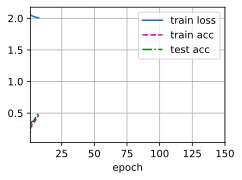

In [8]:
#%matplotlib
start_time = time.time()
train.train_ch6(net, train_loader, test_loader, 150, 0.01, "cuda:0")
elapsed = round(time.time() - start_time)
elapsed = str(datetime.timedelta(seconds=elapsed))
print("Finished. Total elapsed time (h:m:s): {}".format(elapsed))
# %%

In [ ]:
torch.save(net.state_dict(), "more/basic-basic.parm")
# %%

In [ ]:
import d2l.torch as d2l

d2l.train_ch6(net,train_loader,test_loader,20,0.1,'cpu')

In [ ]:
torch.cuda.empty_cache()